In [20]:
import pandas as pd
df = pd.read_csv('my_dataframe.csv',encoding='utf-8')
df.head()  #spoken=1  written=0

,texts,label,parse_tree_depth,noun_count_hi,verb_count_hi,adverb_count_hi,pronoun_count_hi,total_words_hi,noun_percentage_hi,verb_percentage_hi,...,pronoun_percentage_hi,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,2,7,2,0,0,28,25.000000,7.142857,...,0.000000,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,2,2,1,0,1,13,15.384615,7.692308,...,7.692308,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0
2,हमे इन्तजार है ।,1,1,1,0,0,1,4,25.000000,0.000000,...,25.000000,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,2,3,1,0,1,11,27.272727,9.090909,...,9.090909,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0
4,जयपुर,0,0,0,0,0,0,1,0.000000,0.000000,...,0.000000,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0


In [21]:
df = df.drop(columns=['total_words_hi'])

In [22]:
# Separate features and target
X = df.drop('label', axis=1)
X = X.drop('texts', axis=1)
y = df['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

label_mapping = {
    0: "written",
    1: "spoken"
}

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[label_mapping[0], label_mapping[1]]))

Accuracy: 0.8931248384595503

Classification Report:
              precision    recall  f1-score   support

     written       0.90      0.89      0.89      3826
      spoken       0.89      0.90      0.89      3912

    accuracy                           0.89      7738
   macro avg       0.89      0.89      0.89      7738
weighted avg       0.89      0.89      0.89      7738



<ipython-input-27-275f9d1eda65>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)


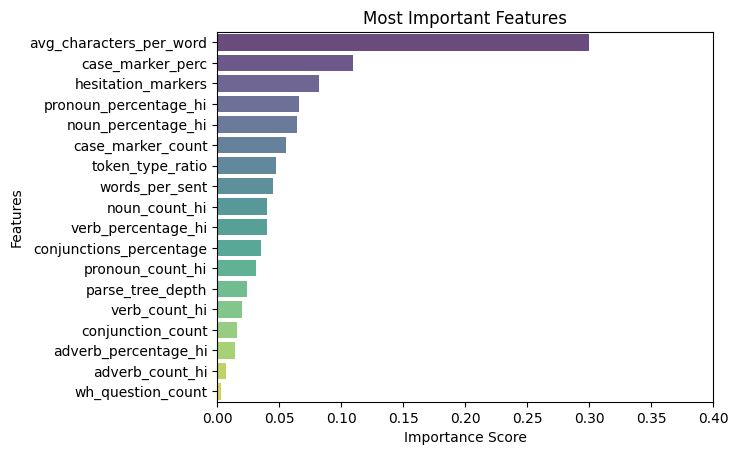

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf.feature_importances_

# Sort features and importances
features_sorted = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Create a horizontal bar chart with color and transparency
ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)

# Set the title, labels, and limits
plt.title("Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.xlim([0, 0.4])
plt.show()

Feature Analysis

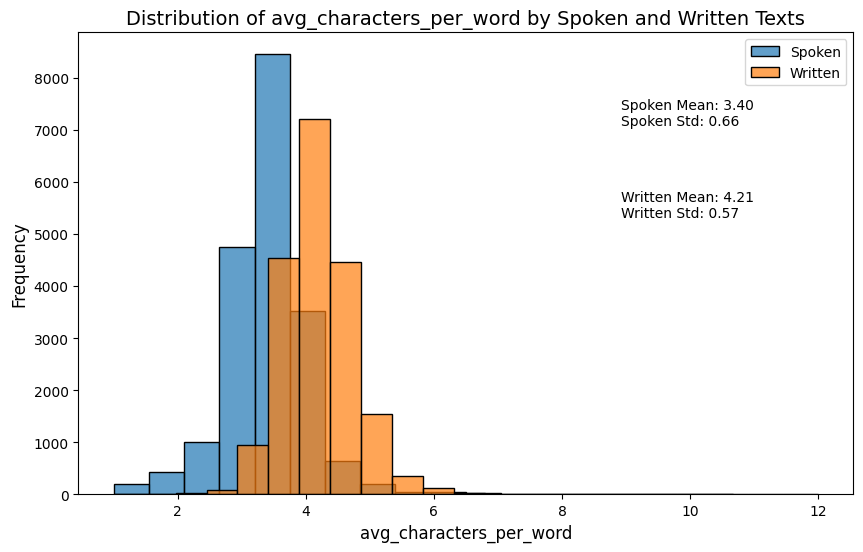

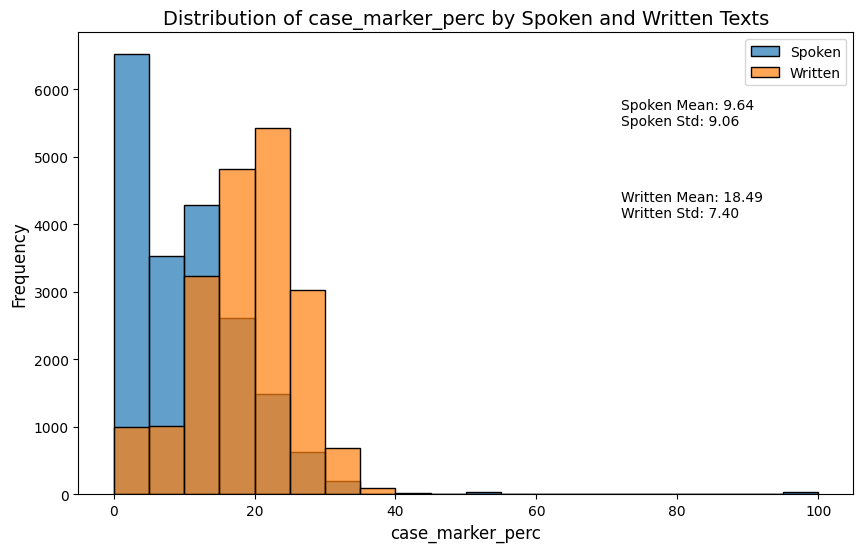

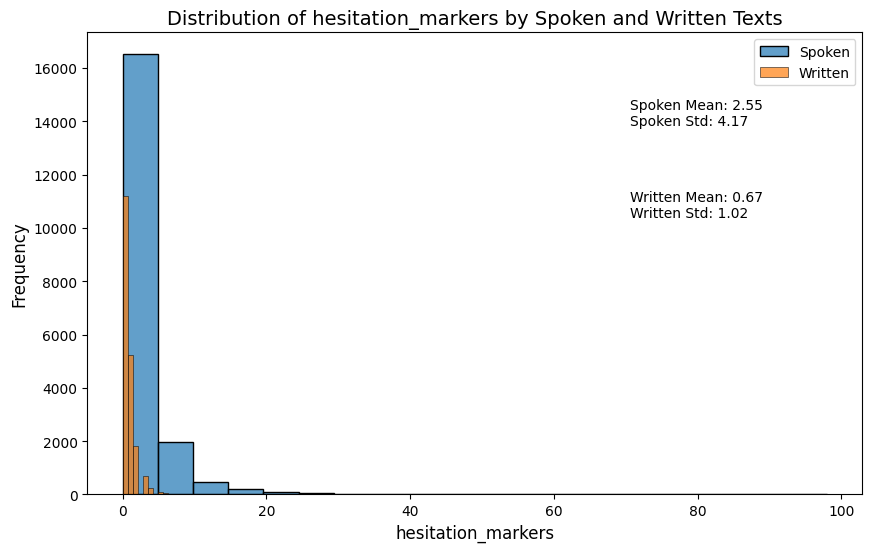

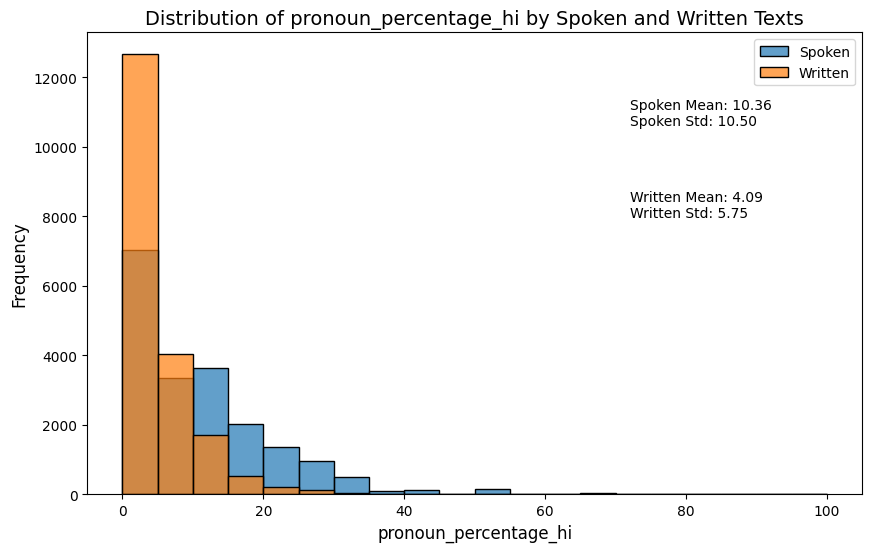

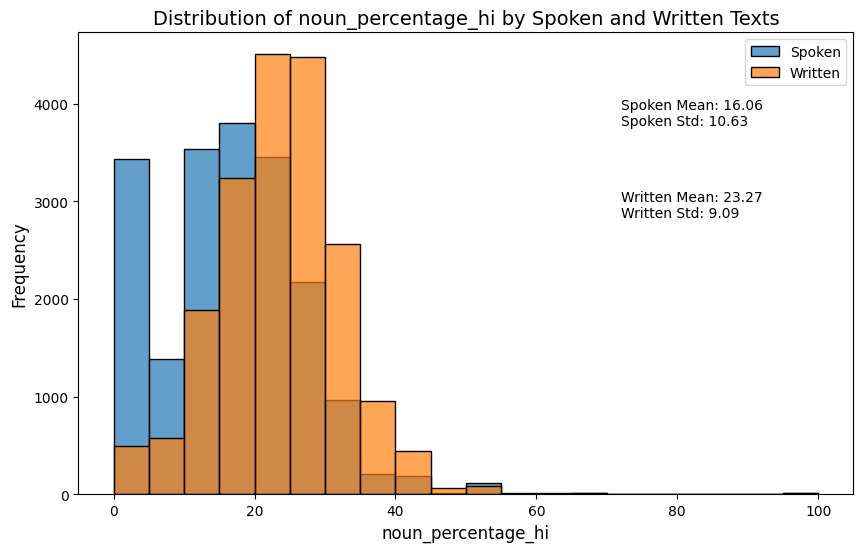

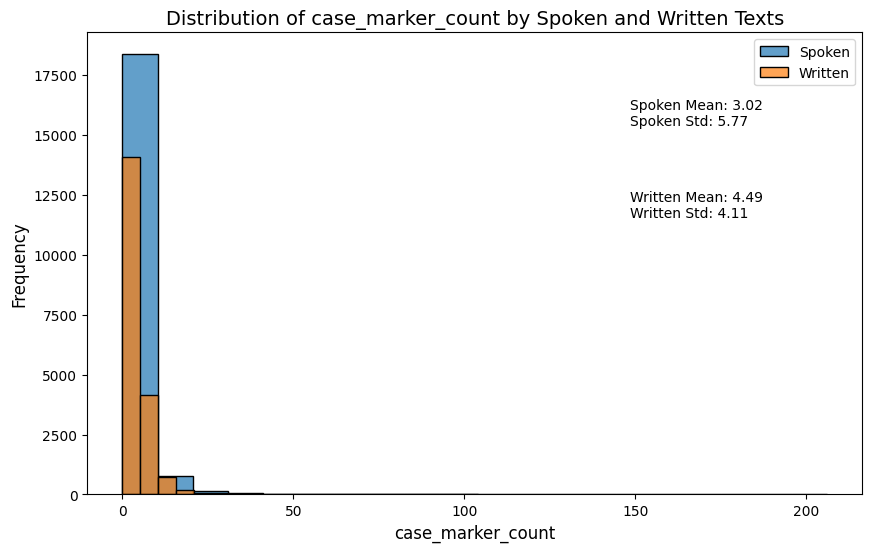

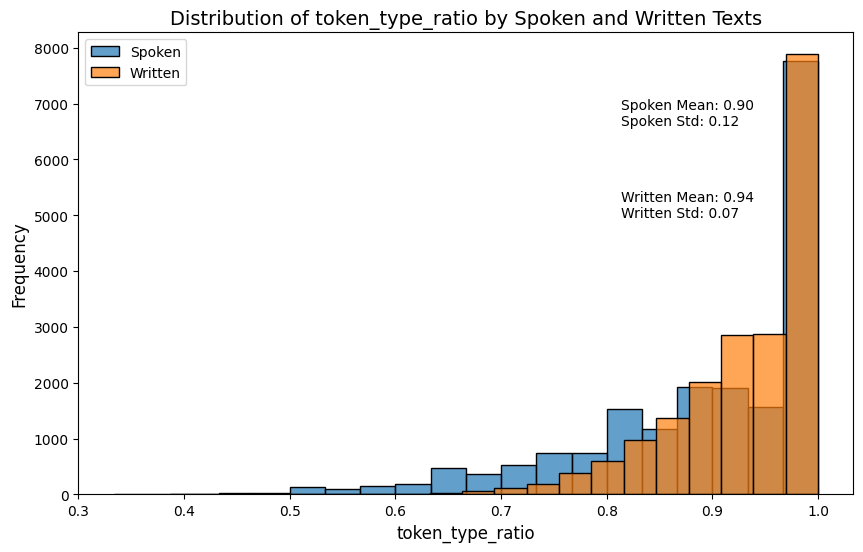

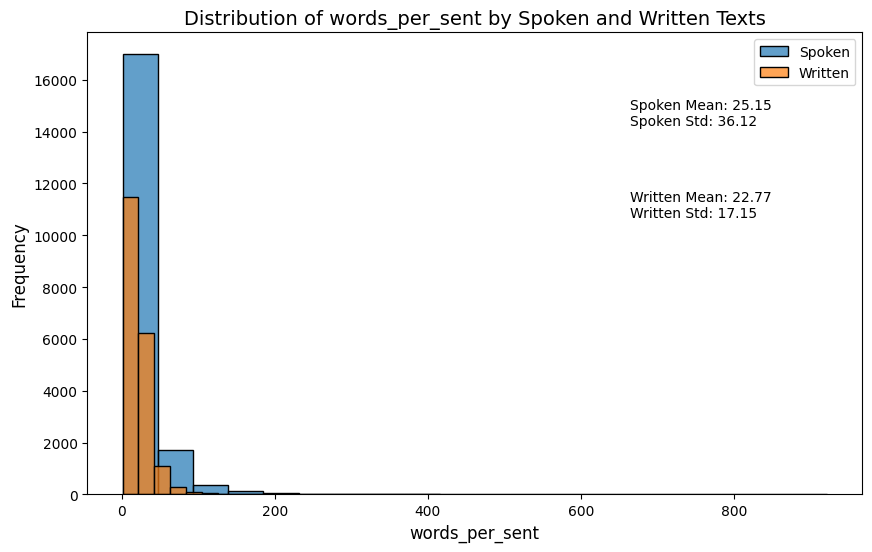

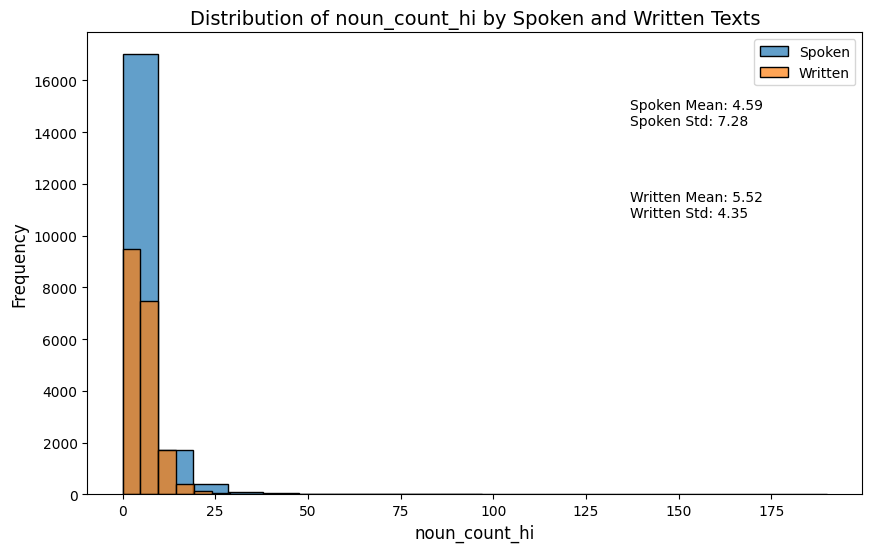

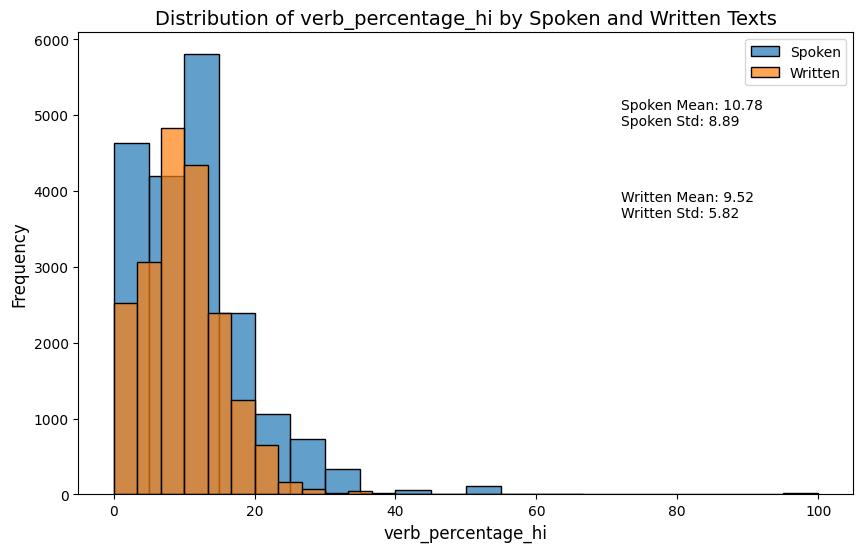

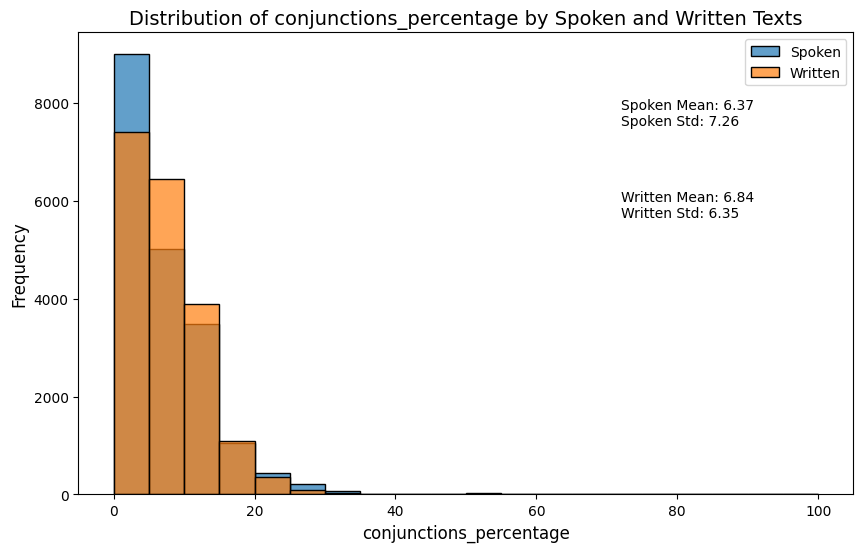

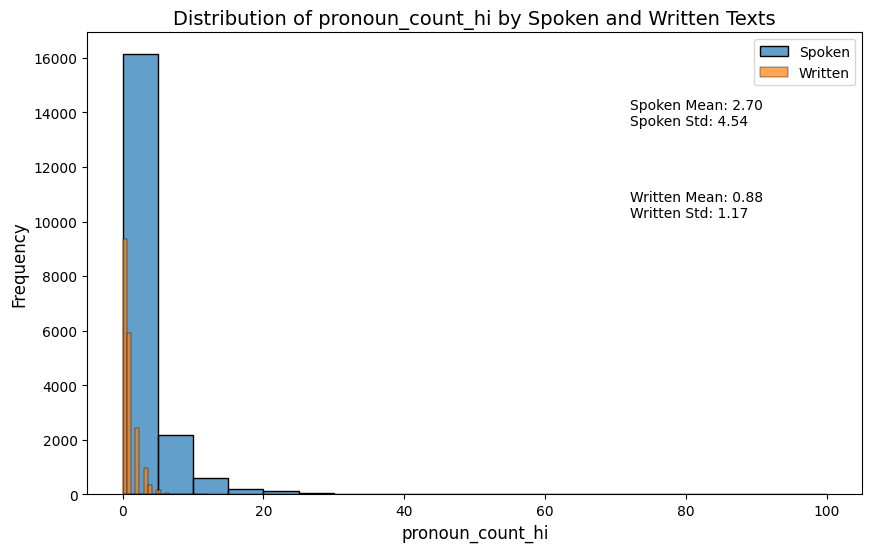

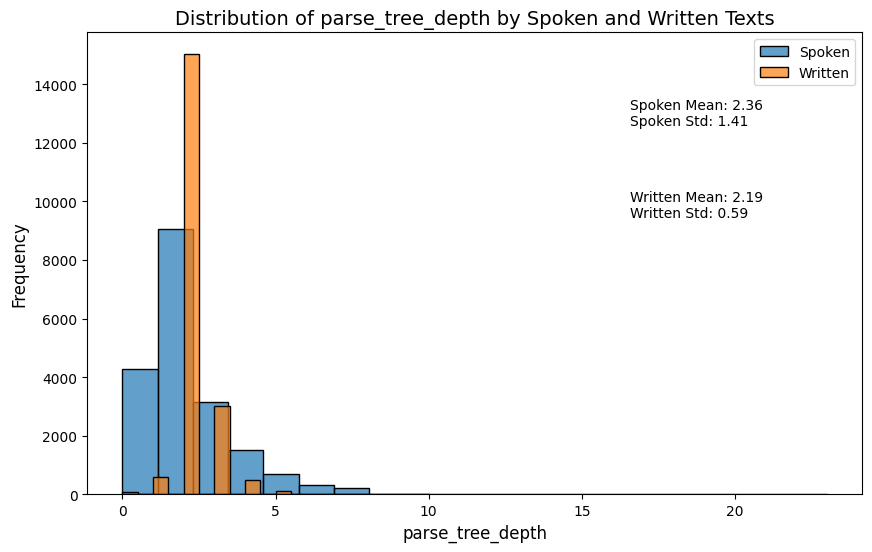

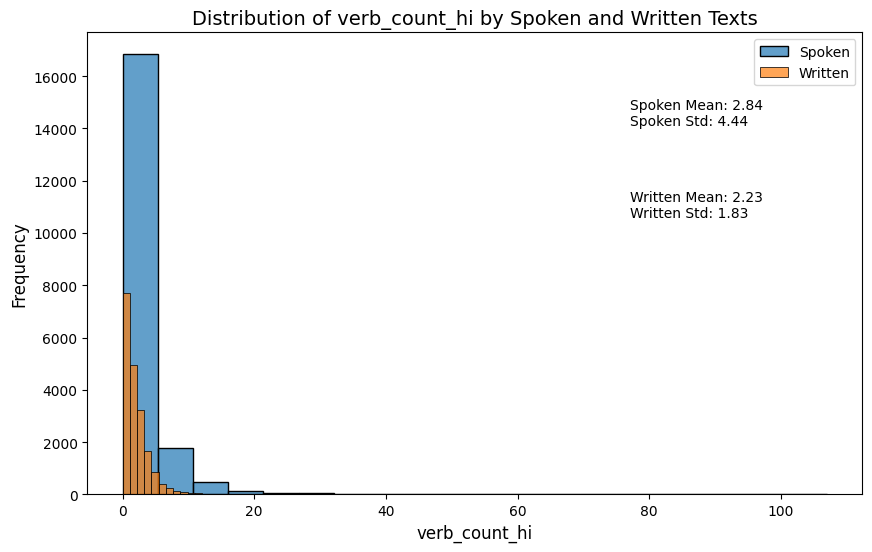

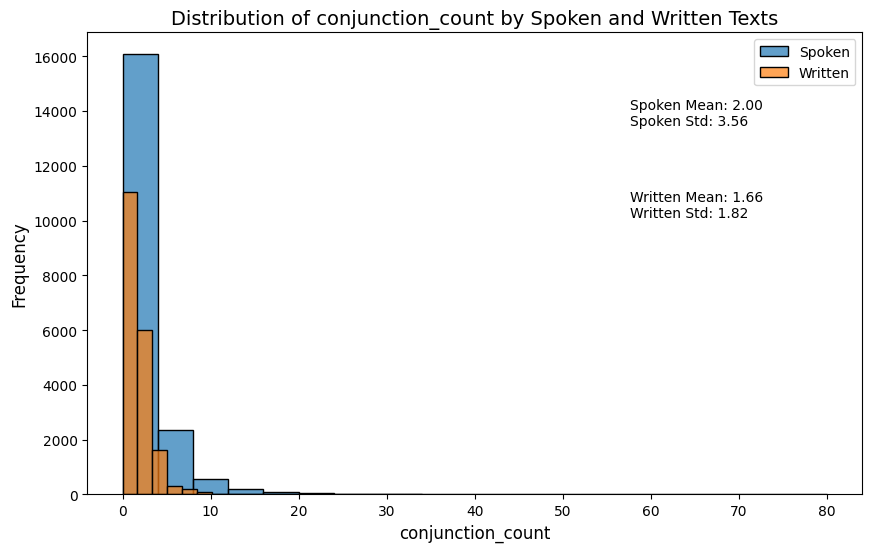

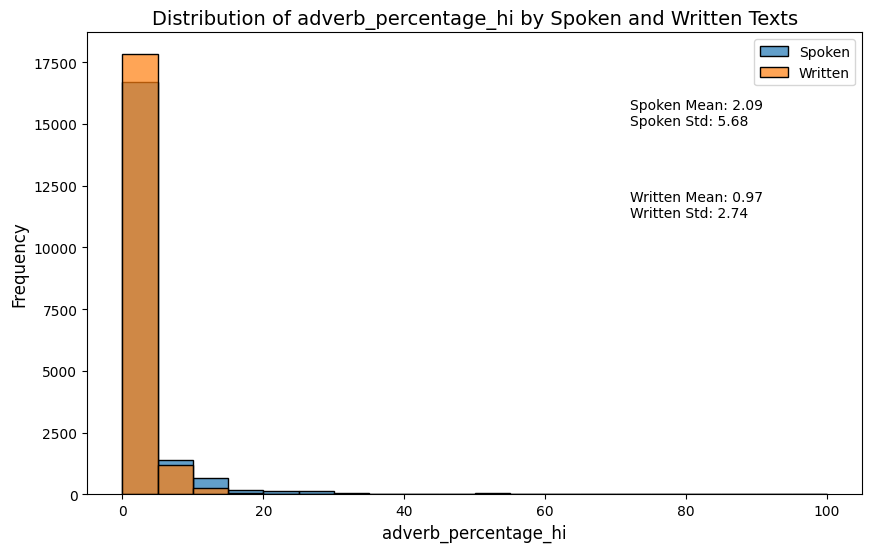

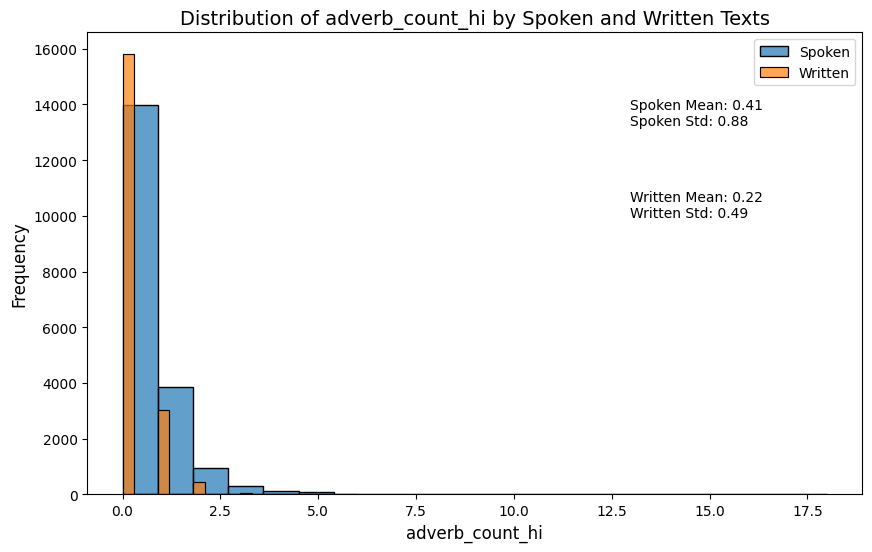

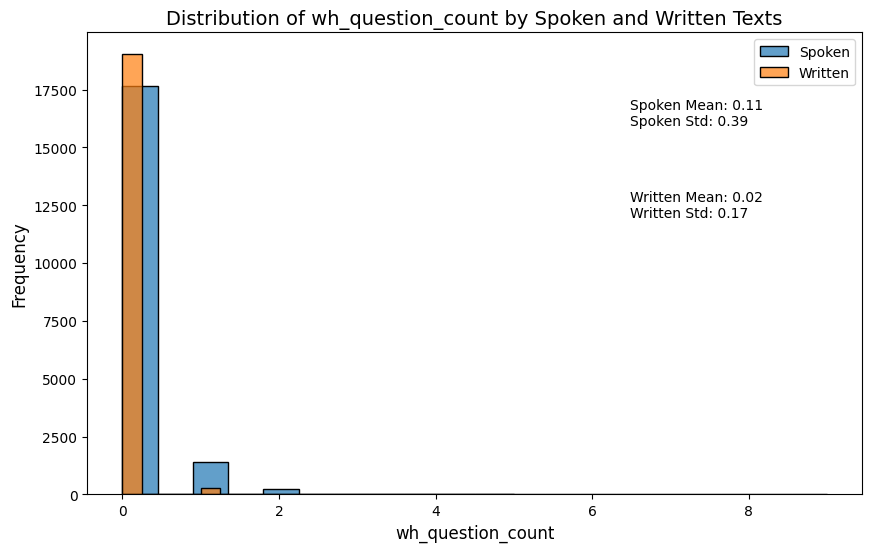

In [38]:
results_df = pd.DataFrame(columns=["Feature", "Spoken Mean", "Spoken Std", "Written Mean", "Written Std", "Importance"])


for feature, importance in zip(X.columns, importances):
    # mean and std
    spoken_texts = df[df['label'] == 1][feature]
    written_texts = df[df['label'] == 0][feature]

    spoken_mean = spoken_texts.mean()
    spoken_std = spoken_texts.std()
    written_mean = written_texts.mean()
    written_std = written_texts.std()
    new_row = pd.DataFrame({"Feature": [feature], "Spoken Mean": [spoken_mean], "Spoken Std": [spoken_std],
                           "Written Mean": [written_mean], "Written Std": [written_std], "Importance": [importance]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Sort the DataFrame by feature importance
results_df = results_df.sort_values(by="Importance", ascending=False)

#loop
for i, row in results_df.iterrows():
    feature = row["Feature"]
    spoken_texts = df[df['label'] == 1][feature]
    written_texts = df[df['label'] == 0][feature]
    spoken_mean = row["Spoken Mean"]
    spoken_std = row["Spoken Std"]
    written_mean = row["Written Mean"]
    written_std = row["Written Std"]

    plt.figure(figsize=(10, 6))
    sns.histplot(spoken_texts, bins=20, label="Spoken", alpha=0.7)
    sns.histplot(written_texts, bins=20, label="Written", alpha=0.7)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"Distribution of {feature} by Spoken and Written Texts", fontsize=14)

    plt.text(0.7, 0.8, f"Spoken Mean: {spoken_mean:.2f}\nSpoken Std: {spoken_std:.2f}",
             transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.7, 0.6, f"Written Mean: {written_mean:.2f}\nWritten Std: {written_std:.2f}",
             transform=plt.gca().transAxes, fontsize=10)

    plt.legend()
    plt.show()

In [46]:
correlation_matrix = X_train.corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df.head()

,parse_tree_depth,noun_count_hi,verb_count_hi,adverb_count_hi,pronoun_count_hi,noun_percentage_hi,verb_percentage_hi,adverb_percentage_hi,pronoun_percentage_hi,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count
parse_tree_depth,1.000000,0.690323,0.728502,0.419011,0.670570,0.108181,0.090373,-0.059827,0.089496,0.767762,0.002279,-0.574974,0.135284,0.601345,0.710516,0.182273,0.686123,0.179187
noun_count_hi,0.690323,1.000000,0.832595,0.437305,0.623814,0.312684,0.001961,-0.070081,-0.078289,0.936256,0.121470,-0.572701,0.234469,0.874701,0.810990,0.129988,0.639381,0.146639
verb_count_hi,0.728502,0.832595,1.000000,0.512391,0.763776,0.038055,0.286034,-0.025865,0.068669,0.908809,-0.025705,-0.547719,0.064655,0.740331,0.787427,0.115340,0.729861,0.210844
adverb_count_hi,0.419011,0.437305,0.512391,1.000000,0.505610,-0.049463,0.051960,0.487657,0.070291,0.519289,-0.052418,-0.359236,-0.068456,0.333974,0.473974,0.090717,0.519443,0.150450
pronoun_count_hi,0.670570,0.623814,0.763776,0.505610,1.000000,-0.083120,0.086704,-0.000211,0.405675,0.764913,-0.147081,-0.536294,-0.118077,0.467602,0.721172,0.120300,0.822664,0.314395


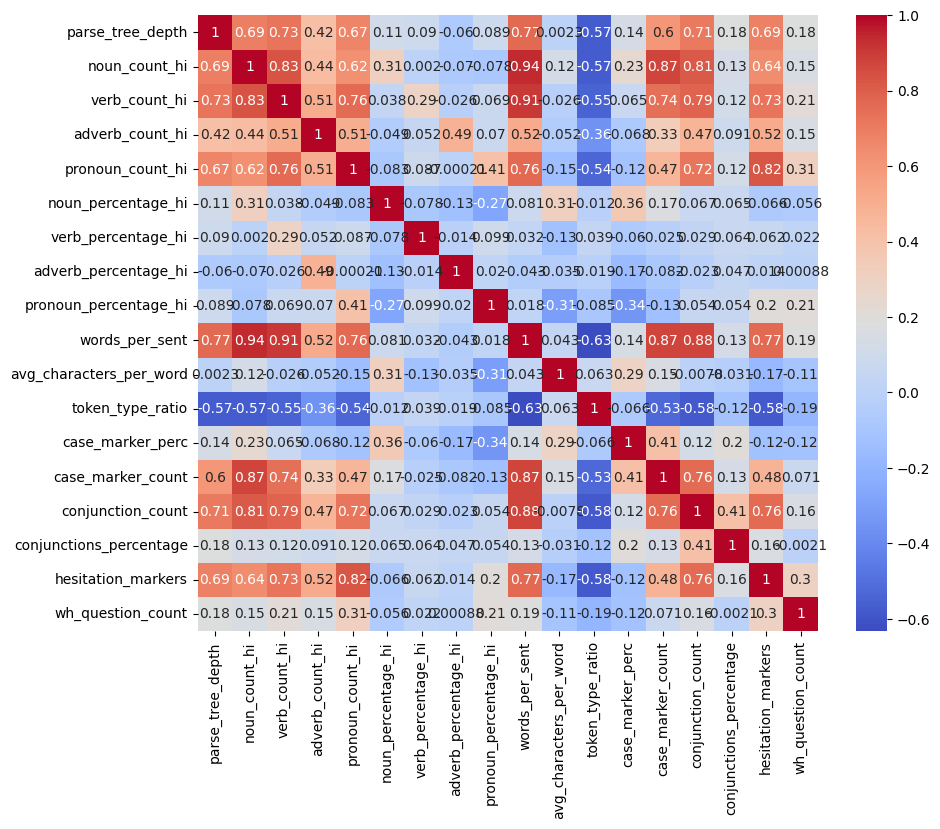

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()
